<a href="https://colab.research.google.com/github/PoliNemkova/conflict_prediction_2025/blob/main/%5B2%5D_Conflict_Prediction_LLM_for_Ukraine_feature_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/grive/')

Mounted at /content/grive/


### Acled data

In [ ]:
# loading ACLED
acled = pd.read_csv('/content/grive/MyDrive/CONFLICT PREDICTION/Fall 2024/acled_bin_all_countries_since_2015.csv')

acled.head(10)

,Country_Name_Short,sum(ACLED_Fatalities),STARTDATE,ENDDATE,abs_change,pct_increase,bin_esc_30
0,Afghanistan,271,2020-01-13,2020-01-20,-1478.0,-8.450543e+01,0
1,Afghanistan,796,2020-09-14,2020-09-21,525.0,1.937269e+02,1
2,Afghanistan,17,2022-12-12,2022-12-19,-779.0,-9.786432e+01,0
3,Afghanistan,17,2023-04-17,2023-04-24,0.0,0.000000e+00,0
4,Afghanistan,14,2023-05-15,2023-05-22,-3.0,-1.764706e+01,0
5,Albania,0,2021-06-14,2021-06-21,0.0,0.000000e+00,0
6,Albania,0,2019-01-07,2019-01-14,0.0,0.000000e+00,0
7,Albania,0,2020-08-31,2020-09-07,0.0,0.000000e+00,0
8,Algeria,0,2018-09-24,2018-10-01,0.0,0.000000e+00,0
9,Algeria,1,2020-05-18,2020-05-25,1.0,1.000000e+12,1


In [ ]:
acled_ukraine = acled[(acled['Country_Name_Short'] == 'Ukraine') &
                    (acled['STARTDATE'] <= '2023-01-01') &
                    (acled['STARTDATE'] >= '2022-01-01')]

len(acled_ukraine)

52

In [ ]:
acled_ukraine['sum(ACLED_Fatalities)'].describe()

,sum(ACLED_Fatalities)
count,52.000000
mean,656.423077
std,413.630239
min,0.000000
25%,440.750000
50%,623.000000
75%,870.500000
max,1909.000000


In [ ]:
# applying transformation for normalizing the fatalities
import numpy as np
acled_ukraine['log_fatalities'] = np.log(acled_ukraine['sum(ACLED_Fatalities)'] + 1)

<ipython-input-5-2a956ac7e273>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acled_ukraine['log_fatalities'] = np.log(acled_ukraine['sum(ACLED_Fatalities)'] + 1)


In [ ]:
acled_ukraine.sort_values(by='STARTDATE', inplace=True)

<ipython-input-6-6be4f66242d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acled_ukraine.sort_values(by='STARTDATE', inplace=True)


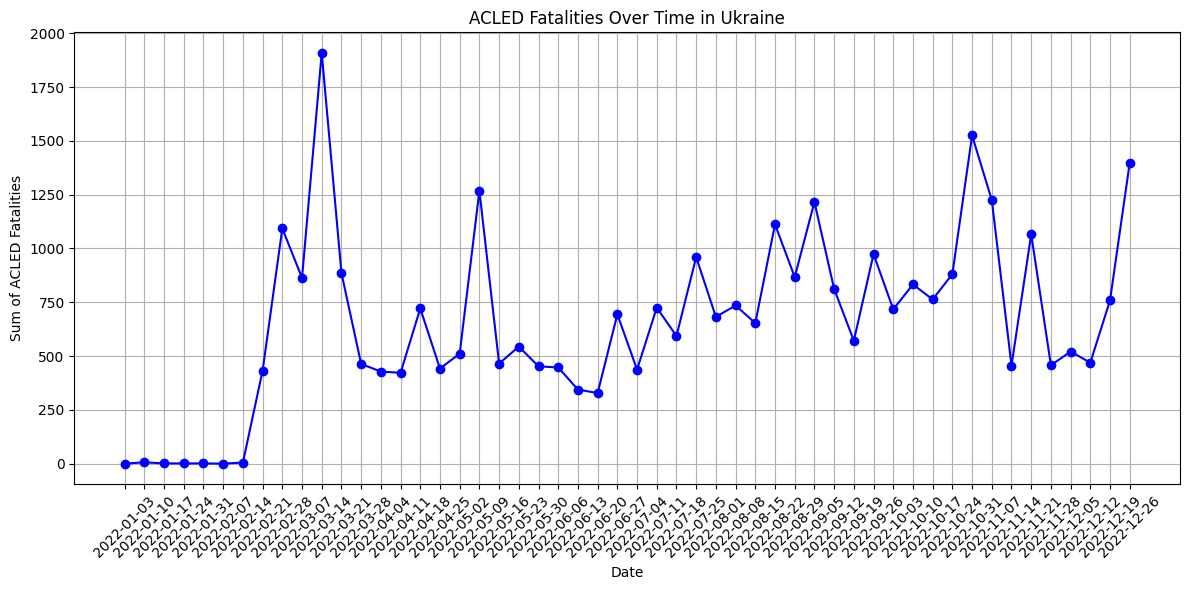

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd

# Sample data with your specified columns
data = {
    'STARTDATE': acled_ukraine['STARTDATE'].to_list() ,
    'sum(ACLED_Fatalities)': acled_ukraine['sum(ACLED_Fatalities)'].to_list()
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df['STARTDATE'], df['sum(ACLED_Fatalities)'], marker='o', linestyle='-', color='b')
plt.title('ACLED Fatalities Over Time in Ukraine')
plt.xlabel('Date')
plt.ylabel('Sum of ACLED Fatalities')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


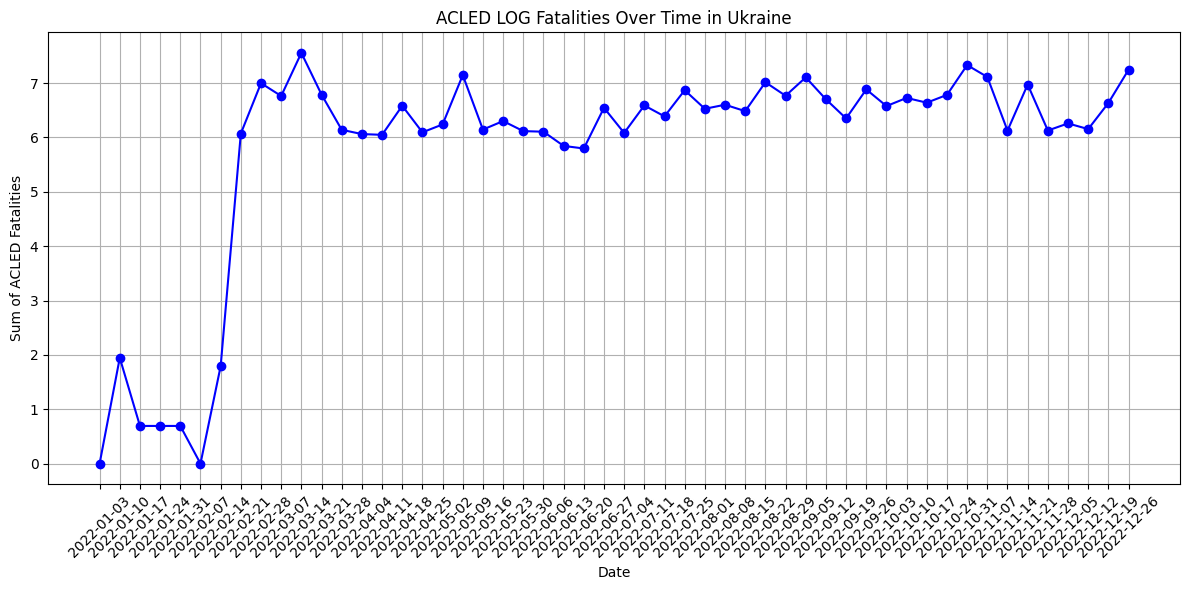

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data with your specified columns
data = {
    'STARTDATE': acled_ukraine['STARTDATE'].to_list() ,
    'log_fatalities': acled_ukraine['log_fatalities'].to_list()
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df['STARTDATE'], df['log_fatalities'], marker='o', linestyle='-', color='b')
plt.title('ACLED LOG Fatalities Over Time in Ukraine')
plt.xlabel('Date')
plt.ylabel('Sum of ACLED Fatalities')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# Adjusting ACLED to be biweekly

starts, ends, fatalities = [], [], []

for i in range(0, len(acled_ukraine) - 1, 2):
    starts.append(acled_ukraine['STARTDATE'].iloc[i])
    ends.append(acled_ukraine['ENDDATE'].iloc[i + 1])
    fatalities.append(
        acled_ukraine['sum(ACLED_Fatalities)'].iloc[i] + acled_ukraine['sum(ACLED_Fatalities)'].iloc[i + 1]
    )

acled_ukraine_biweekly = pd.DataFrame({
    'STARTDATE': starts,
    'ENDDATE': ends,
    'sum(ACLED_Fatalities)': fatalities
})

acled_ukraine_biweekly.head(10)

,STARTDATE,ENDDATE,sum(ACLED_Fatalities)
0,2022-01-03,2022-01-17,6
1,2022-01-17,2022-01-31,2
2,2022-01-31,2022-02-14,1
3,2022-02-14,2022-02-28,437
4,2022-02-28,2022-03-14,1956
5,2022-03-14,2022-03-28,2795
6,2022-03-28,2022-04-11,891
7,2022-04-11,2022-04-25,1143
8,2022-04-25,2022-05-09,953
9,2022-05-09,2022-05-23,1733


In [ ]:
len(acled_ukraine_biweekly)

26

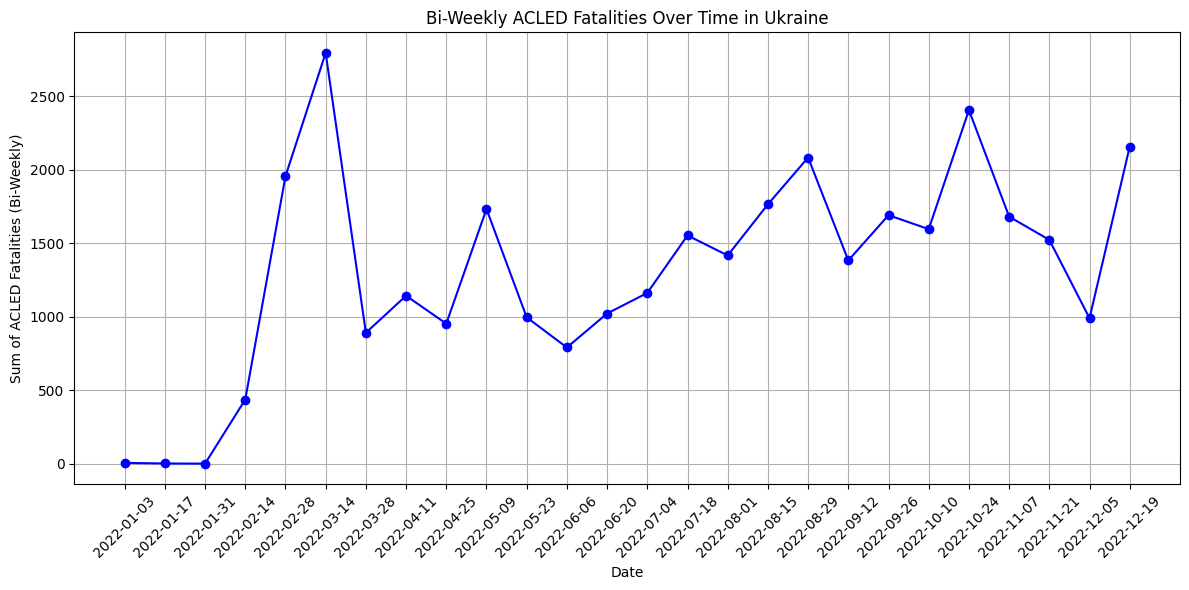

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = acled_ukraine_biweekly
# Plotting the bi-weekly aggregated data
plt.figure(figsize=(12, 6))
plt.plot(df['STARTDATE'], df['sum(ACLED_Fatalities)'], marker='o', linestyle='-', color='b')
plt.title('Bi-Weekly ACLED Fatalities Over Time in Ukraine')
plt.xlabel('Date')
plt.ylabel('Sum of ACLED Fatalities (Bi-Weekly)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# Defining positive examples

fatalities_std = np.std(acled_ukraine_biweekly['sum(ACLED_Fatalities)'])

# Define conditions with safe handling for division by zero
conditions = [

    # option 2 - dramatic increase in fatalities by 100%
    ((acled_ukraine_biweekly['sum(ACLED_Fatalities)'].shift(1) != 0) &
     (((acled_ukraine_biweekly['sum(ACLED_Fatalities)'] / acled_ukraine_biweekly['sum(ACLED_Fatalities)'].shift(1))) > 2)),

    # option 3 - extreme/outlier - value change over one std
    ((acled_ukraine_biweekly['sum(ACLED_Fatalities)'].shift(1) - acled_ukraine_biweekly['sum(ACLED_Fatalities)']) > fatalities_std),

    # option 1 - increase is over 50% or more than 50 victims
    #(acled_sudan_biweekly['sum(ACLED_Fatalities)'] > 50), #|
    #((acled_sudan_biweekly['sum(ACLED_Fatalities)'].shift(1) != 0) &
    # ((1 - (acled_sudan_biweekly['sum(ACLED_Fatalities)'] / acled_sudan_biweekly['sum(ACLED_Fatalities)'].shift(1))) > 0.5)),
]

# Define corresponding values
choices = [2, 3]

# Apply np.select() to assign values based on conditions
acled_ukraine_biweekly['importance'] = np.select(conditions, choices, default=0)

acled_ukraine_biweekly['importance'] = acled_ukraine_biweekly['importance'].apply(lambda x: 1 if x > 0 else 0)

acled_ukraine_biweekly

,STARTDATE,ENDDATE,sum(ACLED_Fatalities),importance
0,2022-01-03,2022-01-17,6,0
1,2022-01-17,2022-01-31,2,0
2,2022-01-31,2022-02-14,1,0
3,2022-02-14,2022-02-28,437,1
4,2022-02-28,2022-03-14,1956,1
5,2022-03-14,2022-03-28,2795,0
6,2022-03-28,2022-04-11,891,1
7,2022-04-11,2022-04-25,1143,0
8,2022-04-25,2022-05-09,953,0
9,2022-05-09,2022-05-23,1733,0


In [ ]:
# adding timespots for simplicity

acled_ukraine_biweekly['backlogged_importance'] = acled_ukraine_biweekly['importance'].shift(-1).fillna(0).astype(int)
acled_ukraine_biweekly['timeslot'] = range(0, len(acled_ukraine_biweekly))
acled_ukraine_biweekly

,STARTDATE,ENDDATE,sum(ACLED_Fatalities),importance,backlogged_importance,timeslot
0,2022-01-03,2022-01-17,6,0,0,0
1,2022-01-17,2022-01-31,2,0,0,1
2,2022-01-31,2022-02-14,1,0,1,2
3,2022-02-14,2022-02-28,437,1,1,3
4,2022-02-28,2022-03-14,1956,1,0,4
5,2022-03-14,2022-03-28,2795,0,1,5
6,2022-03-28,2022-04-11,891,1,0,6
7,2022-04-11,2022-04-25,1143,0,0,7
8,2022-04-25,2022-05-09,953,0,0,8
9,2022-05-09,2022-05-23,1733,0,1,9


### Texts and events data

In [ ]:
ukraine_2022 = pd.read_csv('/content/grive/MyDrive/CONFLICT PREDICTION/Fall 2024/ukraine_2022_events+text+enc.csv')

<ipython-input-25-9dc9c0c8f161>:1: DtypeWarning: Columns (12,17,22) have mixed types. Specify dtype option on import or set low_memory=False.
  ukraine_2022 = pd.read_csv('/content/grive/MyDrive/CONFLICT PREDICTION/Fall 2024/ukraine_2022_events+text+enc.csv')


In [ ]:
ukraine_2022.head()

,Unnamed: 0,level_0,index,globaleventid,sqldate,monthyear,year,fractiondate,actor1code,actor1name,...,actiongeoadm1code,actiongeoadm2code,actiongeolat,actiongeolong,actiongeofeatureid,dateadded,sourceurl,geometry,text,embeddings
0,4,78,88,1021495150,2022-01-01,202201,2022,2022.0027,UKR,UKRAINE,...,UP,NaN,49.0,32.0,UP,20220101234500,https://menafn.com/1103470407/Ukraine-Tajikist...,POINT (32 49),(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...
1,6,75,85,1021495140,2022-01-01,202201,2022,2022.0027,TJK,TAJIKISTAN,...,TI,NaN,39.0,71.0,TI,20220101234500,https://menafn.com/1103470407/Ukraine-Tajikist...,POINT (71 39),(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...
2,7,79,89,1021495151,2022-01-01,202201,2022,2022.0027,UKR,UKRAINE,...,UP,NaN,49.0,32.0,UP,20220101234500,https://menafn.com/1103470407/Ukraine-Tajikist...,POINT (32 49),(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...
3,8,76,86,1021495148,2022-01-01,202201,2022,2022.0027,UKR,UKRAINE,...,UP,NaN,49.0,32.0,UP,20220101234500,https://menafn.com/1103470407/Ukraine-Tajikist...,POINT (32 49),(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...
4,9,74,84,1021495139,2022-01-01,202201,2022,2022.0027,TJK,TAJIKISTAN,...,UP,NaN,49.0,32.0,UP,20220101234500,https://menafn.com/1103470407/Ukraine-Tajikist...,POINT (32 49),(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...


In [ ]:
# Matching timeslots to data in GDELT Sudan


acled_ukraine_biweekly['STARTDATE'] = pd.to_datetime(acled_ukraine_biweekly['STARTDATE'], errors='coerce')
acled_ukraine_biweekly['ENDDATE'] = pd.to_datetime(acled_ukraine_biweekly['ENDDATE'], errors='coerce')

# Create an IntervalIndex from the first table
timeslot_intervals = pd.IntervalIndex.from_arrays(
    acled_ukraine_biweekly['STARTDATE'],
    acled_ukraine_biweekly['ENDDATE'],
    closed='both'
)

# Assign the timeslot based on which interval each date falls into
ukraine_2022['timeslot'] = ukraine_2022['sqldate'].apply(
    lambda x: acled_ukraine_biweekly.loc[timeslot_intervals.contains(x), 'timeslot'].iloc[0] if any(timeslot_intervals.contains(x)) else None
)

# fix the last timeslot that didn't have shifting reference

ukraine_2022['timeslot'].fillna(26, inplace=True)
ukraine_2022['timeslot'] = ukraine_2022['timeslot'].astype(int)

ukraine_2022.head(5)


<ipython-input-27-f69bd8ce9c60>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ukraine_2022['timeslot'].fillna(26, inplace=True)


,Unnamed: 0,level_0,index,globaleventid,sqldate,monthyear,year,fractiondate,actor1code,actor1name,...,actiongeoadm2code,actiongeolat,actiongeolong,actiongeofeatureid,dateadded,sourceurl,geometry,text,embeddings,timeslot
0,4,78,88,1021495150,2022-01-01,202201,2022,2022.0027,UKR,UKRAINE,...,NaN,49.0,32.0,UP,20220101234500,https://menafn.com/1103470407/Ukraine-Tajikist...,POINT (32 49),(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26
1,6,75,85,1021495140,2022-01-01,202201,2022,2022.0027,TJK,TAJIKISTAN,...,NaN,39.0,71.0,TI,20220101234500,https://menafn.com/1103470407/Ukraine-Tajikist...,POINT (71 39),(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26
2,7,79,89,1021495151,2022-01-01,202201,2022,2022.0027,UKR,UKRAINE,...,NaN,49.0,32.0,UP,20220101234500,https://menafn.com/1103470407/Ukraine-Tajikist...,POINT (32 49),(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26
3,8,76,86,1021495148,2022-01-01,202201,2022,2022.0027,UKR,UKRAINE,...,NaN,49.0,32.0,UP,20220101234500,https://menafn.com/1103470407/Ukraine-Tajikist...,POINT (32 49),(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26
4,9,74,84,1021495139,2022-01-01,202201,2022,2022.0027,TJK,TAJIKISTAN,...,NaN,49.0,32.0,UP,20220101234500,https://menafn.com/1103470407/Ukraine-Tajikist...,POINT (32 49),(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26


In [ ]:
ukraine_2022['timeslot'].nunique()

27

In [ ]:
ukraine_2022.iloc[450]

,450
Unnamed: 0,700
level_0,823
index,864
globaleventid,1026336755
sqldate,2022-02-02
...,...
sourceurl,https://journalstar.com/news/state-and-regiona...
geometry,POINT (69.1833 34.5167)
text,Sen. Deb Fischer objected Wednesday to the Bid...
embeddings,[-3.89859855e-01 -1.09826788e-01 -1.73626989e-...


In [ ]:
# dropping bunch of columns from GDELT that are currently not used

ukraine_light = ukraine_2022[['globaleventid', 'sqldate', 'goldsteinscale',
       'nummentions', 'numsources', 'numarticles', 'avgtone',  'text',
       'embeddings', 'timeslot']]

In [ ]:
# adding importance (positivity sign) to the GDELT set

ukraine_light = pd.merge(ukraine_light, acled_ukraine_biweekly[['timeslot', 'backlogged_importance']], on='timeslot', how='left')
ukraine_light

,globaleventid,sqldate,goldsteinscale,nummentions,numsources,numarticles,avgtone,text,embeddings,timeslot,backlogged_importance
0,1021495150,2022-01-01,6.4,3,1,3,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,NaN
1,1021495140,2022-01-01,1.0,1,1,1,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,NaN
2,1021495151,2022-01-01,6.4,2,1,2,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,NaN
3,1021495148,2022-01-01,1.0,3,1,3,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,NaN
4,1021495139,2022-01-01,1.0,3,1,3,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10612,1078325770,2022-12-31,0.0,1,1,1,-6.597938,As the year 2023 was about to knock on the doo...,[-1.23091705e-01 1.04460970e-01 1.90775514e-...,25,0.0
10613,1078325774,2022-12-31,0.0,4,1,4,-6.597938,As the year 2023 was about to knock on the doo...,[-1.23091705e-01 1.04460970e-01 1.90775514e-...,25,0.0
10614,1078325773,2022-12-31,0.0,2,1,2,-6.597938,As the year 2023 was about to knock on the doo...,[-1.23091705e-01 1.04460970e-01 1.90775514e-...,25,0.0
10615,1078325769,2022-12-31,7.0,10,1,10,-6.597938,As the year 2023 was about to knock on the doo...,[-1.23091705e-01 1.04460970e-01 1.90775514e-...,25,0.0


In [ ]:
# working with positive examples

positive_articles = ukraine_light[ukraine_light['backlogged_importance'] == 1]
negative_articles = ukraine_light[ukraine_light['backlogged_importance'] == 0]

len(positive_articles), len(negative_articles)

(3041, 7544)

In [ ]:
positive_articles['text'].nunique()

710

In [ ]:
negative_articles['text'].nunique()

1694

##### Cosine Similarity with Positive and Negative average embedding

In [ ]:
# getting mean positive embedding

arrays = []
for item in positive_articles['embeddings']:
  string_list = item.replace('[', ' ').replace(']', ' ').replace('\n', ' ').split()
  final = [float(number) for number in string_list]
  arrays.append(final)

array = np.array(arrays)
mean_positive_embedding = array.mean(axis=0)
len(mean_positive_embedding)

768

In [ ]:
# getting mean negative embedding

arrays = []
for item in negative_articles['embeddings']:
  string_list = item.replace('[', ' ').replace(']', ' ').replace('\n', ' ').split()
  final = [float(number) for number in string_list]
  arrays.append(final)

array = np.array(arrays)
mean_negative_embedding = array.mean(axis=0)
len(mean_negative_embedding)

768

In [ ]:
# calculate cosign similarity with negative and positive embeddings across the GDELT set

from sklearn.metrics.pairwise import cosine_similarity

cos_sim_pos = []
cos_sim_neg = []

for i in range(len(ukraine_light)):
  string_list = ukraine_light['embeddings'].iloc[i].replace('[', ' ').replace(']', ' ').replace('\n', ' ').split()
  numeric_embedding = [float(number) for number in string_list]
  similarity_positive = cosine_similarity(np.array(numeric_embedding).reshape(1, -1), np.array(mean_positive_embedding).reshape(1, -1))
  cos_sim_pos.append(similarity_positive[0][0])
  similarity_negative = cosine_similarity(np.array(numeric_embedding).reshape(1, -1), np.array(mean_negative_embedding).reshape(1, -1))
  cos_sim_neg.append(similarity_negative[0][0])

ukraine_light['cosine_similarity_positive'] = cos_sim_pos
ukraine_light['cosine_similarity_negative'] = cos_sim_neg

In [ ]:
ukraine_light.head(5)

,globaleventid,sqldate,goldsteinscale,nummentions,numsources,numarticles,avgtone,text,embeddings,timeslot,backlogged_importance,cosine_similarity_positive,cosine_similarity_negative
0,1021495150,2022-01-01,6.4,3,1,3,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,NaN,0.857748,0.858279
1,1021495140,2022-01-01,1.0,1,1,1,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,NaN,0.857748,0.858279
2,1021495151,2022-01-01,6.4,2,1,2,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,NaN,0.857748,0.858279
3,1021495148,2022-01-01,1.0,3,1,3,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,NaN,0.857748,0.858279
4,1021495139,2022-01-01,1.0,3,1,3,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,NaN,0.857748,0.858279


##### Topic Modeling

In [ ]:
# adding topic modeling

!pip install pandas numpy gensim scikit-learn nltk

import pandas as pd
import numpy as np
import nltk
import gensim
from gensim import corpora
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK data (only the first time)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Load your dataset (replace this with your actual dataset)
articles = ukraine_light['text']

# Define custom stop words
stop_words = set(stopwords.words('english')).union(ENGLISH_STOP_WORDS)

# Preprocess the text
def preprocess_text(text):
    # Tokenize, remove punctuation, stop words, and convert to lowercase
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

articles['tokens'] = articles.apply(preprocess_text)


# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(articles['tokens'])

# Filter out words that occur too frequently or too rarely
dictionary.filter_extremes(no_below=2, no_above=0.5)

# Create the bag-of-words corpus
corpus = [dictionary.doc2bow(tokens) for tokens in articles['tokens']]


from gensim.models import LdaModel

# Train the LDA model
num_topics = 20  # Adjust the number of topics as needed
lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

# Display the topics found by the model
topics = lda_model.print_topics(num_words=3)
for topic in topics:
    print(topic)

# Function to get top N topics for a document
def get_top_topics(lda_model, corpus, n=3):
    top_topics = []
    for bow in corpus:
        topic_probs = lda_model.get_document_topics(bow)
        # Sort topics by their probability in descending order
        top_n = sorted(topic_probs, key=lambda x: x[1], reverse=True)[:n]
        top_topics.append([topic_id for topic_id, prob in top_n])
    return top_topics

# Assign top 3 topics to each article
articles['top_topics'] = get_top_topics(lda_model, corpus, n=3)

articles.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-39-c64dc6df7233>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles['tokens'] = articles.apply(preprocess_text)


(0, '0.038*"poland" + 0.034*"air" + 0.024*"force"')
(1, '0.023*"biden" + 0.011*"house" + 0.010*"weapons"')
(2, '0.015*"crimes" + 0.010*"kyiv" + 0.009*"turkey"')
(3, '0.019*"day" + 0.018*"children" + 0.011*"lady"')
(4, '0.014*"media" + 0.011*"news" + 0.006*"propaganda"')
(5, '0.018*"minsk" + 0.016*"donetsk" + 0.015*"ceasefire"')
(6, '0.017*"gmt" + 0.015*"zelenskyy" + 0.011*"says"')
(7, '0.013*"nato" + 0.013*"putin" + 0.009*"world"')
(8, '0.011*"students" + 0.008*"government" + 0.007*"advertisement"')
(9, '0.018*"avdiivka" + 0.010*"george" + 0.010*"pope"')
(10, '0.073*"https" + 0.034*"forces" + 0.019*"reported"')
(11, '0.014*"support" + 0.012*"refugees" + 0.010*"help"')
(12, '0.011*"family" + 0.010*"like" + 0.010*"says"')
(13, '0.016*"putin" + 0.013*"nato" + 0.013*"troops"')
(14, '0.014*"minister" + 0.012*"foreign" + 0.011*"macron"')
(15, '0.014*"kyiv" + 0.014*"nuclear" + 0.013*"power"')
(16, '0.019*"forces" + 0.016*"city" + 0.011*"troops"')
(17, '0.029*"putin" + 0.016*"kherson" + 0.013*

,text
0,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...
1,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...
2,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...
3,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...
4,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...


In [ ]:
topics[0][1]

'0.038*"poland" + 0.034*"air" + 0.024*"force"'

In [ ]:
topics[0]

(0, '0.038*"poland" + 0.034*"air" + 0.024*"force"')

In [ ]:
# Adding topic number and verbose to the GDELT set

topic_numbers = []
topics_verbose = []
for item in articles['top_topics']:
  top_topic_number = item[0]
  topic_verbose = topics[top_topic_number][1]
  #print(top_topic_number,' and verbose: ', topic_verbose )
  topic_numbers.append(top_topic_number)
  topics_verbose.append(topic_verbose)

ukraine_light['topic_number'] = topic_numbers
ukraine_light['topic_verbose'] = topics_verbose

ukraine_light.head()

,globaleventid,sqldate,goldsteinscale,nummentions,numsources,numarticles,avgtone,text,embeddings,timeslot,backlogged_importance,cosine_similarity_positive,cosine_similarity_negative,topic_number,topic_verbose
0,1021495150,2022-01-01,6.4,3,1,3,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,NaN,0.857748,0.858279,14,"0.014*""minister"" + 0.012*""foreign"" + 0.011*""ma..."
1,1021495140,2022-01-01,1.0,1,1,1,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,NaN,0.857748,0.858279,14,"0.014*""minister"" + 0.012*""foreign"" + 0.011*""ma..."
2,1021495151,2022-01-01,6.4,2,1,2,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,NaN,0.857748,0.858279,14,"0.014*""minister"" + 0.012*""foreign"" + 0.011*""ma..."
3,1021495148,2022-01-01,1.0,3,1,3,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,NaN,0.857748,0.858279,14,"0.014*""minister"" + 0.012*""foreign"" + 0.011*""ma..."
4,1021495139,2022-01-01,1.0,3,1,3,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,NaN,0.857748,0.858279,14,"0.014*""minister"" + 0.012*""foreign"" + 0.011*""ma..."


##### Sentiment score

In [ ]:
# adding sentiment score

!pip install nltk
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Sample DataFrame (replace this with your actual dataset)
articles = ukraine_light['text']

# Function to calculate sentiment score
def get_sentiment_score(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

# Add a new column for sentiment score
sentiment_scores = articles.apply(get_sentiment_score)
ukraine_light['sentiment_score'] = sentiment_scores
ukraine_light

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,globaleventid,sqldate,goldsteinscale,nummentions,numsources,numarticles,avgtone,text,embeddings,timeslot,backlogged_importance,cosine_similarity_positive,cosine_similarity_negative,topic_number,topic_verbose,sentiment_score
0,1021495150,2022-01-01,6.4,3,1,3,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,NaN,0.857748,0.858279,14,"0.014*""minister"" + 0.012*""foreign"" + 0.011*""ma...",0.9260
1,1021495140,2022-01-01,1.0,1,1,1,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,NaN,0.857748,0.858279,14,"0.014*""minister"" + 0.012*""foreign"" + 0.011*""ma...",0.9260
2,1021495151,2022-01-01,6.4,2,1,2,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,NaN,0.857748,0.858279,14,"0.014*""minister"" + 0.012*""foreign"" + 0.011*""ma...",0.9260
3,1021495148,2022-01-01,1.0,3,1,3,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,NaN,0.857748,0.858279,14,"0.014*""minister"" + 0.012*""foreign"" + 0.011*""ma...",0.9260
4,1021495139,2022-01-01,1.0,3,1,3,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,NaN,0.857748,0.858279,14,"0.014*""minister"" + 0.012*""foreign"" + 0.011*""ma...",0.9260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10612,1078325770,2022-12-31,0.0,1,1,1,-6.597938,As the year 2023 was about to knock on the doo...,[-1.23091705e-01 1.04460970e-01 1.90775514e-...,25,0.0,0.946489,0.949242,15,"0.014*""kyiv"" + 0.014*""nuclear"" + 0.013*""power""",-0.9953
10613,1078325774,2022-12-31,0.0,4,1,4,-6.597938,As the year 2023 was about to knock on the doo...,[-1.23091705e-01 1.04460970e-01 1.90775514e-...,25,0.0,0.946489,0.949242,15,"0.014*""kyiv"" + 0.014*""nuclear"" + 0.013*""power""",-0.9953
10614,1078325773,2022-12-31,0.0,2,1,2,-6.597938,As the year 2023 was about to knock on the doo...,[-1.23091705e-01 1.04460970e-01 1.90775514e-...,25,0.0,0.946489,0.949242,15,"0.014*""kyiv"" + 0.014*""nuclear"" + 0.013*""power""",-0.9953
10615,1078325769,2022-12-31,7.0,10,1,10,-6.597938,As the year 2023 was about to knock on the doo...,[-1.23091705e-01 1.04460970e-01 1.90775514e-...,25,0.0,0.946489,0.949242,15,"0.014*""kyiv"" + 0.014*""nuclear"" + 0.013*""power""",-0.9953


In [ ]:
sentiment_scores.describe()

,text
count,10617.000000
mean,-0.265110
std,0.845585
min,-1.000000
25%,-0.993000
50%,-0.846800
75%,0.812600
max,1.000000


In [ ]:
ukraine_light.head(5)

,globaleventid,sqldate,goldsteinscale,nummentions,numsources,numarticles,avgtone,text,embeddings,timeslot,backlogged_importance,cosine_similarity_positive,cosine_similarity_negative,topic_number,topic_verbose,sentiment_score
0,1021495150,2022-01-01,6.4,3,1,3,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,NaN,0.857748,0.858279,14,"0.014*""minister"" + 0.012*""foreign"" + 0.011*""ma...",0.926
1,1021495140,2022-01-01,1.0,1,1,1,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,NaN,0.857748,0.858279,14,"0.014*""minister"" + 0.012*""foreign"" + 0.011*""ma...",0.926
2,1021495151,2022-01-01,6.4,2,1,2,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,NaN,0.857748,0.858279,14,"0.014*""minister"" + 0.012*""foreign"" + 0.011*""ma...",0.926
3,1021495148,2022-01-01,1.0,3,1,3,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,NaN,0.857748,0.858279,14,"0.014*""minister"" + 0.012*""foreign"" + 0.011*""ma...",0.926
4,1021495139,2022-01-01,1.0,3,1,3,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,NaN,0.857748,0.858279,14,"0.014*""minister"" + 0.012*""foreign"" + 0.011*""ma...",0.926


In [ ]:
ukraine_light['topic_verbose'].iloc[1]

'0.014*"minister" + 0.012*"foreign" + 0.011*"macron"'

In [ ]:
# Fixing topics verbose

import pandas as pd

# Sample data
data = ukraine_light['topic_verbose']
df = pd.DataFrame(data)

# Function to split the data string into separate columns
def split_data_string(row):
    # Split by ' + ' to get individual components
    components = row.split(' + ')
    # Extract the numeric value and word from each component
    split_components = []
    for component in components:
        value, word = component.split('*')
        # Remove quotes from the word
        word = word.replace('"', '')
        split_components.extend([float(value), word])
    return split_components

# Apply the function and create new columns
ukraine_light[['dominance_score_1', 'topic1', 'dominance_score_2', 'topic2', 'dominance_score_3', 'topic3']] = ukraine_light['topic_verbose'].apply(split_data_string).apply(pd.Series)
# Display the resulting DataFrame
ukraine_light.head()


,globaleventid,sqldate,goldsteinscale,nummentions,numsources,numarticles,avgtone,text,embeddings,timeslot,...,cosine_similarity_negative,topic_number,topic_verbose,sentiment_score,dominance_score_1,topic1,dominance_score_2,topic2,dominance_score_3,topic3
0,1021495150,2022-01-01,6.4,3,1,3,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,...,0.858279,14,"0.014*""minister"" + 0.012*""foreign"" + 0.011*""ma...",0.926,0.014,minister,0.012,foreign,0.011,macron
1,1021495140,2022-01-01,1.0,1,1,1,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,...,0.858279,14,"0.014*""minister"" + 0.012*""foreign"" + 0.011*""ma...",0.926,0.014,minister,0.012,foreign,0.011,macron
2,1021495151,2022-01-01,6.4,2,1,2,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,...,0.858279,14,"0.014*""minister"" + 0.012*""foreign"" + 0.011*""ma...",0.926,0.014,minister,0.012,foreign,0.011,macron
3,1021495148,2022-01-01,1.0,3,1,3,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,...,0.858279,14,"0.014*""minister"" + 0.012*""foreign"" + 0.011*""ma...",0.926,0.014,minister,0.012,foreign,0.011,macron
4,1021495139,2022-01-01,1.0,3,1,3,2.721088,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,[-2.04477355e-01 3.99352044e-01 3.07540536e-...,26,...,0.858279,14,"0.014*""minister"" + 0.012*""foreign"" + 0.011*""ma...",0.926,0.014,minister,0.012,foreign,0.011,macron


In [ ]:
# Most common topics in Ukraine GDELT

ukraine_light['topic_number'].value_counts().sort_values(ascending=False)

,count
topic_number,
16,1449
1,1118
13,938
12,904
11,880
15,842
7,701
19,638
14,522


In [ ]:
ukraine_light.to_csv('/content/grive/MyDrive/CONFLICT PREDICTION/Fall 2024/Ukraine data/ukraine_light.csv')

In [ ]:
ukraine_light = pd.read_csv('/content/grive/MyDrive/CONFLICT PREDICTION/Fall 2024/Ukraine Data/ukraine_light.csv')

In [ ]:
# since concutination of the full text articles is too long I add summaries (of each article separately)
# THIS CELL TOOK ME ~ 7-8 HOURS TO RUN

'''

# started at 5.45pm
import pandas as pd
from transformers import pipeline

# Initialize the summarization pipeline using BART
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

articles = ukraine_light['text']

# Function to generate a summary for each article with input length control
def generate_summary(text, max_length=50, min_length=25):
    # Truncate the text to a maximum of 1024 tokens
    if len(text.split()) > 512:  # Adjust this number if needed
        text = ' '.join(text.split()[:512])

    # Generate summary
    try:
        summary = summarizer(text, max_length=max_length, min_length=min_length, do_sample=False)
        return summary[0]['summary_text']
    except Exception as e:
        return f"Error: {e}"

# Apply the summarization function to each article
summaries = articles.apply(generate_summary)

ukraine_light['summary'] = summaries['text']

# Display the DataFrame with summaries
summaries

'''


In [ ]:
#sudan_light['summary'] = summaries['text']
#summaries.to_csv('/content/grive/MyDrive/CONFLICT PREDICTION/Fall 2024/summaries.csv')
summaries = pd.read_csv('/content/grive/MyDrive/CONFLICT PREDICTION/Fall 2024/summaries.csv')

In [ ]:
### this is faster alternative for summaries (but cost about 22$)

articles = ukraine_light.drop_duplicates(subset = 'text')
articles = articles[['text']]


# was trying with GPT


import pandas as pd
import openai
from tqdm import tqdm

# Set your OpenAI API key
openai.api_key = ''

# Function to generate a summary for each article using GPT
def generate_summary_with_gpt(text, max_length=100, min_length=50):
    # Truncate the text to fit within token limits (considering max tokens for input + output)
    if len(text.split()) > 800:  # Adjust this limit based on your needs
        text = ' '.join(text.split()[:800])

    try:
        # Make a request to GPT using the updated interface
        response = openai.ChatCompletion.create(
            model="gpt-4-turbo",  # Use "gpt-3.5-turbo" for faster responses if needed
            messages=[
                {"role": "system", "content": "You are a helpful assistant that summarizes texts."},
                {"role": "user", "content": f"Please summarize the following text in {min_length}-{max_length} words: {text}"}
            ],
            max_tokens=50,  # Adjust based on the desired summary length
            temperature=0  # Ensures consistent output
        )
        # Extract and return the summary content
        summary = response['choices'][0]['message']['content'].strip()
        return summary
    except Exception as e:
        # Log errors and return None for failed cases
        print(f"Error: {e}")
        return None


# Add progress tracking
tqdm.pandas()

# Assuming ukraine_light['text'] contains the articles
articles['summary'] = articles['text'].progress_apply(generate_summary_with_gpt)


articles.to_csv('/content/grive/MyDrive/CONFLICT PREDICTION/Fall 2024/Ukraine Data/ukraine_summaries.csv')
# Display the DataFrame with summaries
articles.head()


ukraine_light = ukraine_light.merge(articles, on = 'text')
ukraine_light = ukraine_light.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y'])

In [ ]:
ukraine_light['summary'] = summaries['text']

In [ ]:
#from tkinter import N
# comparing the quality of the summaries
n=756
print(

    '_________FULL TEXT: ', ukraine_light['text'].iloc[n], '\n\n\n',
    '_________SUMMARY: ', ukraine_light['summary'].iloc[n])

_________FULL TEXT:  Key Pumping Station in DPR Damaged in Shelling by Ukrainian Forces

The Vasilyevsky pumping station, which provides water to almost two million Donbass residents on both sides of the line of contact, has been damaged as a result of shelling by Ukrainian forces, DPR has announced. The village of Vasilyevka, where the pumping station is located, has been left without water, according to a DPR representative.

Earlier, the DPR representative office in the Joint Center for Control and Coordination on ceasefire (JCCC) said that Ukrainian forces had shelled the village of Vasilyevka in the self-proclaimed Donetsk republic, firing four 82-millimeter mortars. 


 _________SUMMARY:  The Vasilyevsky pumping station in the Donetsk People's Republic (DPR), crucial for supplying water to nearly two million residents across the Donbass region, has been damaged due to shelling by Ukrainian forces. This attack left the village of


In [ ]:
ukraine_light['summary'].isna().sum()

0

In [ ]:
ukraine_light.columns

Index(['Unnamed: 0', 'globaleventid', 'sqldate', 'goldsteinscale',
       'nummentions', 'numsources', 'numarticles', 'avgtone', 'text',
       'embeddings', 'timeslot', 'backlogged_importance',
       'cosine_similarity_positive', 'cosine_similarity_negative',
       'topic_number', 'topic_verbose', 'sentiment_score', 'dominance_score_1',
       'topic1', 'dominance_score_2', 'topic2', 'dominance_score_3', 'topic3',
       'summary'],
      dtype='object')

In [ ]:
ukraine_light['dominance_score_1'].mean()

0.017092869925591034

In [ ]:
# compiling the set by timeslot

goldsteinscale, events_density, nummentions, numsources, numarticles, avgtone, cosine_similarity_positive, cosine_similarity_negative, strings, topics, sentiments, sentiment_std, avg_embeddings, unique_articles, summaries_all, goldstein_min_maxs, topic_1s, topic_2s, topic_3s, dominance_score_1s, dominance_score_2s, dominance_score_3s  = [], [], [], [], [], [], [], [], [], [], [], [], [], [], [],[], [], [], [], [], [], []
timeslots = ukraine_light['timeslot'].unique()

for i in timeslots:

  part = ukraine_light[ukraine_light['timeslot']==i]

  goldsteinscale_average = part['goldsteinscale'].mean()
  goldstein_min_max = [part['goldsteinscale'].min(), part['goldsteinscale'].max()]
  nummentions_sum = part['nummentions'].sum()
  numsources_sum = part['numsources'].sum()
  numarticles_sum = part['numarticles'].sum()
  avgtone_average = part['avgtone'].mean()
  cosine_similarity_positive_average = part['cosine_similarity_positive'].mean()
  cosine_similarity_negative_average = part['cosine_similarity_negative'].mean()
  event_density = len(part)
  topic = part['topic_number'].mode().iloc[0]
  sentiment = part['sentiment_score'].mean()
  sentiment_std_part = part['sentiment_score'].std()
  # dealing with topcs
  topic_1 = part['topic1'].mode().iloc[0]
  topic_2 = part['topic2'].mode().iloc[0]
  topic_3 = part['topic3'].mode().iloc[0]

  dominance_score_1 = part['dominance_score_1'].mean()
  dominance_score_2 = part['dominance_score_2'].mean()
  dominance_score_3 = part['dominance_score_3'].mean()


  # calc avg emb
  arrays = []
  for item in part['embeddings']:
    string_list = item.replace('[', ' ').replace(']', ' ').replace('\n', ' ').split()
    final = [float(number) for number in string_list]
    arrays.append(final)
  array = np.array(arrays)
  avg_embedding = array.mean(axis=0)

  goldsteinscale.append(goldsteinscale_average)
  goldstein_min_maxs.append(goldstein_min_max)
  nummentions.append(nummentions_sum)
  numsources.append(numsources_sum)
  numarticles.append(numarticles_sum)
  avgtone.append(avgtone_average)
  cosine_similarity_positive.append(cosine_similarity_positive_average)
  cosine_similarity_negative.append(cosine_similarity_negative_average)
  events_density.append(event_density)
  sentiments.append(sentiment)
  sentiment_std.append(sentiment_std_part)
  topics.append(topic)
  avg_embeddings.append(avg_embedding)
  topic_1s.append(topic_1)
  topic_2s.append(topic_2)
  topic_3s.append(topic_3)
  dominance_score_1s.append(dominance_score_1)
  dominance_score_2s.append(dominance_score_2)
  dominance_score_3s.append(dominance_score_3)

  # after here we're using unique articles NLP features
  part = part.drop_duplicates(subset=['text'])
  unique_articles_count = len(part)
  big_string = ''
  for j in range(len(part)):
    big_string = big_string + part['text'].iloc[j] + ' '+ str(part['sqldate'].iloc[j]) +' [SEP]'
  summaries_set = ''
  for j in range(len(part)):
    summaries_set = summaries_set + part['summary'].iloc[j] + ' '+ str(part['sqldate'].iloc[j]) +' [SEP]'

  strings.append(big_string)
  unique_articles.append(unique_articles_count)
  summaries_all.append(summaries_set)


biweekly_Ukraine_2022 = pd.DataFrame({
    'timeslot': timeslots,
    'goldsteinscale': goldsteinscale,
    'goldstein_min_max': goldstein_min_maxs,
    'avgtone': avgtone,
    'events_density': events_density,
    'unique_articles': unique_articles,
    'nummentions': nummentions,
    'numsources': numsources,
    'numarticles': numarticles,
    'cosine_similarity_positive': cosine_similarity_positive,
    'cosine_similarity_negative': cosine_similarity_negative,
    'avg_embeddings': avg_embeddings,
    'topic': topics,
    'topic_1': topic_1s,
    'dominance_score_1': dominance_score_1s,
    'topic_2': topic_2s,
    'dominance_score_2': dominance_score_2s,
    'topic_3': topic_3s,
    'dominance_score_3': dominance_score_3s,
    'sentiment': sentiments,
    'sentiment_std': sentiment_std,
    'strings': strings,
    'summaries': summaries_all
})

biweekly_Ukraine_2022.head()

,timeslot,goldsteinscale,goldstein_min_max,avgtone,events_density,unique_articles,nummentions,numsources,numarticles,cosine_similarity_positive,...,topic_1,dominance_score_1,topic_2,dominance_score_2,topic_3,dominance_score_3,sentiment,sentiment_std,strings,summaries
0,26,1.518750,"[-7.2, 7.0]",0.466119,32,4,79,32,79,0.904987,...,putin,0.015781,nato,0.012719,troops,0.012469,0.955319,0.021112,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,Ukraine's Deputy Foreign Minister Dmytro Senik...
1,0,0.582927,"[-10.0, 10.0]",-2.293248,82,22,253,85,253,0.866614,...,putin,0.015878,nato,0.011939,troops,0.011037,-0.180074,0.813410,"San Francisco, CA January 03, 2022 --( PR.com ...","Steven Pifer, a former U.S. Ambassador to Ukra..."
2,1,1.744904,"[-10.0, 10.0]",-3.006921,314,72,1224,342,1224,0.900174,...,putin,0.016930,nato,0.012102,troops,0.011497,-0.032880,0.888643,What started as Russian saber-rattling along t...,The situation that began with Russian military...
3,2,-0.072527,"[-10.0, 10.0]",-3.055013,182,48,597,184,597,0.886866,...,putin,0.017912,nato,0.014170,troops,0.012231,0.038366,0.744618,"AMARI AIR BASE, Estonia — With roaring engines...",U.S. F-15 fighter jets have been deployed to A...
4,3,0.037229,"[-10.0, 10.0]",-4.026023,967,238,3360,1003,3321,0.888640,...,putin,0.015908,nato,0.013023,troops,0.011032,-0.309031,0.802882,Meghan found love in Ukraine. Now her heart is...,"Meghan Neville, an American, moved to Ukraine ..."


In [ ]:
len(biweekly_Ukraine_2022['strings'][6])

1087826

In [ ]:
len(biweekly_Ukraine_2022['summaries'][6])

64555

In [ ]:
# adding keywords


!pip install keybert transformers torch

import pandas as pd
from keybert import KeyBERT

# Initialize KeyBERT with a pre-trained BERT model
kw_model = KeyBERT('all-MiniLM-L6-v2')  # You can use other models like 'distilbert-base-nli-mean-tokens'

# Sample DataFrame (replace this with your actual dataset)
articles = biweekly_Ukraine_2022['strings']

# Function to extract keywords using KeyBERT
def extract_keywords(text, model, top_n=10):
    keywords = model.extract_keywords(text, keyphrase_ngram_range=(1, 2), stop_words='english', top_n=top_n)
    return [keyword[0] for keyword in keywords]

# Apply the function to extract keywords for each article
keywords_list = articles.apply(lambda x: extract_keywords(x, kw_model))
biweekly_Ukraine_2022['keywords'] = keywords_list
keywords_list

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

,strings
0,"[relations ukraine, goods ukraine, invade ukra..."
1,"[ukraine relations, ambassador ukraine, geopol..."
2,"[putin diplomacy, attack putin, ukraine strate..."
3,"[nato airspace, baltic airspace, russian airst..."
4,"[meghan love, meghan neville, neville love, am..."
5,"[troops belarus, belarus invasion, belarus sec..."
6,"[chernobyl russia, chernobyl risk, ukraine nuc..."
7,"[bombs russia, russia bombardment, munitions u..."
8,"[ukrainian troops, troops ukraine, military uk..."
9,"[stinger missiles, produce missiles, missile p..."


In [ ]:
biweekly_Ukraine_2022.head()

,timeslot,goldsteinscale,goldstein_min_max,avgtone,events_density,unique_articles,nummentions,numsources,numarticles,cosine_similarity_positive,...,dominance_score_1,topic_2,dominance_score_2,topic_3,dominance_score_3,sentiment,sentiment_std,strings,summaries,keywords
0,26,1.518750,"[-7.2, 7.0]",0.466119,32,4,79,32,79,0.904987,...,0.015781,nato,0.012719,troops,0.012469,0.955319,0.021112,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,Ukraine's Deputy Foreign Minister Dmytro Senik...,"[relations ukraine, goods ukraine, invade ukra..."
1,0,0.582927,"[-10.0, 10.0]",-2.293248,82,22,253,85,253,0.866614,...,0.015878,nato,0.011939,troops,0.011037,-0.180074,0.813410,"San Francisco, CA January 03, 2022 --( PR.com ...","Steven Pifer, a former U.S. Ambassador to Ukra...","[ukraine relations, ambassador ukraine, geopol..."
2,1,1.744904,"[-10.0, 10.0]",-3.006921,314,72,1224,342,1224,0.900174,...,0.016930,nato,0.012102,troops,0.011497,-0.032880,0.888643,What started as Russian saber-rattling along t...,The situation that began with Russian military...,"[putin diplomacy, attack putin, ukraine strate..."
3,2,-0.072527,"[-10.0, 10.0]",-3.055013,182,48,597,184,597,0.886866,...,0.017912,nato,0.014170,troops,0.012231,0.038366,0.744618,"AMARI AIR BASE, Estonia — With roaring engines...",U.S. F-15 fighter jets have been deployed to A...,"[nato airspace, baltic airspace, russian airst..."
4,3,0.037229,"[-10.0, 10.0]",-4.026023,967,238,3360,1003,3321,0.888640,...,0.015908,nato,0.013023,troops,0.011032,-0.309031,0.802882,Meghan found love in Ukraine. Now her heart is...,"Meghan Neville, an American, moved to Ukraine ...","[meghan love, meghan neville, neville love, am..."


In [ ]:
len(biweekly_Ukraine_2022)

27

In [ ]:
len(acled_ukraine_biweekly)

26

In [ ]:
biweekly_Ukraine_2022['timeslot'].unique()

array([26,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

In [ ]:
acled_ukraine_biweekly['timeslot'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [ ]:
biweekly_Ukraine_2022.columns

Index(['timeslot', 'goldsteinscale', 'goldstein_min_max', 'avgtone',
       'events_density', 'unique_articles', 'nummentions', 'numsources',
       'numarticles', 'cosine_similarity_positive',
       'cosine_similarity_negative', 'avg_embeddings', 'topic', 'topic_1',
       'dominance_score_1', 'topic_2', 'dominance_score_2', 'topic_3',
       'dominance_score_3', 'sentiment', 'sentiment_std', 'strings',
       'summaries', 'keywords'],
      dtype='object')

In [ ]:
final = pd.merge(biweekly_Ukraine_2022, acled_ukraine_biweekly, on='timeslot', how='left')
final

,timeslot,goldsteinscale,goldstein_min_max,avgtone,events_density,unique_articles,nummentions,numsources,numarticles,cosine_similarity_positive,...,sentiment,sentiment_std,strings,summaries,keywords,STARTDATE,ENDDATE,sum(ACLED_Fatalities),importance,backlogged_importance
0,26,1.518750,"[-7.2, 7.0]",0.466119,32,4,79,32,79,0.904987,...,0.955319,0.021112,(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,Ukraine's Deputy Foreign Minister Dmytro Senik...,"[relations ukraine, goods ukraine, invade ukra...",NaN,NaN,NaN,NaN,NaN
1,0,0.582927,"[-10.0, 10.0]",-2.293248,82,22,253,85,253,0.866614,...,-0.180074,0.813410,"San Francisco, CA January 03, 2022 --( PR.com ...","Steven Pifer, a former U.S. Ambassador to Ukra...","[ukraine relations, ambassador ukraine, geopol...",2022-01-03,2022-01-17,6.0,0.0,0.0
2,1,1.744904,"[-10.0, 10.0]",-3.006921,314,72,1224,342,1224,0.900174,...,-0.032880,0.888643,What started as Russian saber-rattling along t...,The situation that began with Russian military...,"[putin diplomacy, attack putin, ukraine strate...",2022-01-17,2022-01-31,2.0,0.0,0.0
3,2,-0.072527,"[-10.0, 10.0]",-3.055013,182,48,597,184,597,0.886866,...,0.038366,0.744618,"AMARI AIR BASE, Estonia — With roaring engines...",U.S. F-15 fighter jets have been deployed to A...,"[nato airspace, baltic airspace, russian airst...",2022-01-31,2022-02-14,1.0,0.0,1.0
4,3,0.037229,"[-10.0, 10.0]",-4.026023,967,238,3360,1003,3321,0.888640,...,-0.309031,0.802882,Meghan found love in Ukraine. Now her heart is...,"Meghan Neville, an American, moved to Ukraine ...","[meghan love, meghan neville, neville love, am...",2022-02-14,2022-02-28,437.0,1.0,1.0
5,4,0.640969,"[-10.0, 10.0]",-3.057223,1445,332,5424,1648,5354,0.872154,...,-0.155562,0.870601,Belarusian President Alexander Lukashenko said...,Belarusian President Alexander Lukashenko has ...,"[troops belarus, belarus invasion, belarus sec...",2022-02-28,2022-03-14,1956.0,1.0,0.0
6,5,-0.185700,"[-10.0, 10.0]",-3.112994,993,234,3443,1058,3386,0.872067,...,-0.356760,0.813315,Russian forces have threatened safety at sever...,"Three weeks into Russia's invasion of Ukraine,...","[chernobyl russia, chernobyl risk, ukraine nuc...",2022-03-14,2022-03-28,2795.0,0.0,1.0
7,6,1.348212,"[-10.0, 10.0]",-3.438710,755,161,2723,856,2707,0.857119,...,-0.175528,0.888096,Satellite photos of what appeared to be rows u...,Satellite images revealed mass graves near Mar...,"[bombs russia, russia bombardment, munitions u...",2022-03-28,2022-04-11,891.0,1.0,0.0
8,7,0.643050,"[-10.0, 10.0]",-3.518678,518,131,1772,522,1762,0.885777,...,-0.444791,0.793029,"Judy Woodruff:\n\nMeanwhile, the White House i...",The White House is addressing inquiries regard...,"[ukrainian troops, troops ukraine, military uk...",2022-04-11,2022-04-25,1143.0,0.0,0.0
9,8,0.820608,"[-10.0, 8.3]",-3.182211,592,133,2285,650,2270,0.879320,...,-0.509428,0.747235,The CEO of the US weapons maker Raytheon said ...,"Raytheon's CEO, Greg Hayes, announced that the...","[stinger missiles, produce missiles, missile p...",2022-04-25,2022-05-09,953.0,0.0,0.0


In [ ]:
final.to_csv('/content/grive/MyDrive/CONFLICT PREDICTION/Fall 2024/Ukraine Data/biweekly_Ukraine_2022_FINAL.csv')

In [ ]:
final.columns

Index(['timeslot', 'goldsteinscale', 'goldstein_min_max', 'avgtone',
       'events_density', 'unique_articles', 'nummentions', 'numsources',
       'numarticles', 'cosine_similarity_positive',
       'cosine_similarity_negative', 'avg_embeddings', 'topic', 'topic_1',
       'dominance_score_1', 'topic_2', 'dominance_score_2', 'topic_3',
       'dominance_score_3', 'sentiment', 'sentiment_std', 'strings',
       'summaries', 'keywords', 'STARTDATE', 'ENDDATE',
       'sum(ACLED_Fatalities)', 'importance', 'backlogged_importance'],
      dtype='object')

#### Models and Experiments were moved to this motebook

